<a href="https://colab.research.google.com/github/sharonma1218/stats306/blob/main/week10_readings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
library(tidyverse)
options(repr.plot.width=8, repr.plot.height=5, repl.plot.dpi=150)
theme_set(theme_classic())

In [91]:
install.packages("babynames")
library(babynames)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Week 10 Readings 

## 15: Strings

Agenda:
* Creating strings from data 
* Extracting strings from data 
* Tools that work w individual letters 

### 15.2: Creating a string 

In [ ]:
string1<-"this is a string"
string1

[1] "this is a string"

To include a literal single or double quote, you need to use `\` to escape it:

In [ ]:
double_quote<-"\""
double_quote

[1] "\""

If you want to include a literal backslash, you'll need to escape it as well: `\\`

In [ ]:
backslash<-"\\"
backslash

[1] "\\"

### 15.3: Creating strings from data

`str_c()` returns a character vector

In [ ]:
str_c("x","y")
str_c("Hello ",c("John","Susan"))

[1] "xy"

[1] "Hello John"  "Hello Susan"

`str_c()` is designed to be used w `mutate()`

In [ ]:
install.packages("wakefield")
library(wakefield)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘chron’




In [ ]:
set.seed(1410)
df<-tibble(name=c(wakefield::name(3),NA))
df%>%mutate(greeting=str_c("Hi ",name,"!"))

name,greeting
<chr>,<chr>
Ilena,Hi Ilena!
Sacramento,Hi Sacramento!
Graylon,Hi Graylon!
NA,NA


`str_glue()`: anything inside {} will be evaluated like it's outside of the quotes. Also works well w mutate. 

In [ ]:
df%>%mutate(greeting=str_glue("Hi {name}!"))

name,greeting
<chr>,<glue>
Ilena,Hi Ilena!
Sacramento,Hi Sacramento!
Graylon,Hi Graylon!
NA,Hi NA!


If you do want to keep the regular {} in your string, you'd need to escape it by doubling the special characters:

In [ ]:
df%>%mutate(greeting=str_glue("{{Hi {name}!}}"))

name,greeting
<chr>,<glue>
Ilena,{Hi Ilena!}
Sacramento,{Hi Sacramento!}
Graylon,{Hi Graylon!}
NA,{Hi NA!}


`str_flatten()` works well w `summarize()`. Something that always returns a single string. Takes a character vector and combines each elemtn of the vector into a single string. 

In [ ]:
str_flatten(c("x","y","z"))
str_flatten(c("x","y","z"),",")

[1] "xyz"

[1] "x,y,z"

In [ ]:
df<-tribble(
  ~name,~fruit,
  "Carmen","banana",
  "Carmen","apple",
  "Marvin","nectarine",
  "Terrence","cantaloupe",
  "Terrence","papaya",
  "Terrence","mandarine"
)

df%>%
  group_by(name)%>%
  summarize(fruits=str_flatten(fruit,", "))

name,fruits
<chr>,<chr>
Carmen,"banana, apple"
Marvin,nectarine
Terrence,"cantaloupe, papaya, mandarine"


### 15.4: Extracting data from strings 

#### 15.4.1: Separating into rows

It's common for multiple varaibles to be crammed together into a single string.

4 tidyr functions to extract them:

1. `df%>%separate_longer_delim(col,delim)`

2. `df%>%separate_longer_position(col,width)`

3. `df%>%separate_wider_delim(col,delim,names)`

4. `df%>%separate_wider_position(col,widths)`

`delim` splits up a string with a delimiter like "," or " "

`position` splits at specific widths, like c(3,5,2)

In [ ]:
df1<-tibble(x=c("a,b,c","d,e","f"))
df1%>%separate_longer_delim(x,delim=",")

x
<chr>
a
b
c
d
e
f


#### 15.4.2: Separating into columns 

In [ ]:
df3<-tibble(x=c("a10.1.2022","b10.2.2011","e15.1.2015"))

df3%>%
  separate_wider_delim(
    x,
    delim=".",
    names=c("code","edition","year")
  )

code,edition,year
<chr>,<chr>,<chr>
a10,1,2022
b10,2,2011
e15,1,2015


In [92]:
install.packages("tidyr")
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



If you have too many pieces, you can either drop or merge:

In [ ]:
df<-tibble(x=c("1-1-1","1-1-2","1-3-5-6","1-3-2","1-3-5-7-9"))

df%>%
  separate_wider_delim(
    x,
    delim="-",
    names=c("x","y","z"),
    too_many="drop"
  )

df%>%
  separate_wider_delim(
    x,
    delim="-",
    names=c("x","y","z"),
    too_many="merge"
  )

x,y,z
<chr>,<chr>,<chr>
1,1,1
1,1,2
1,3,5
1,3,2
1,3,5


x,y,z
<chr>,<chr>,<chr>
1,1,1
1,1,2
1,3,5-6
1,3,2
1,3,5-7-9


### 15.5 Letters

`str_length()` tells you the number of letters in the string

In [ ]:
str_length(c("a","R for data science",NA))

[1]  1 18 NA

Use this w `count()` to find the distribution of lengths of US babynames. 

In [ ]:
babynames%>%count(length=str_length(name),wt=n)

length,n
<int>,<int>
2,338150
3,8589596
4,48506739
5,87011607
6,90749404
7,72120767
8,25404066
9,11926551
10,1306159


#### 15.5.2: Subsetting

`str_sub(string,start,end)`: used to extract parts of a string, where start and end are the letters where the substring should start and end. These arguments are inclusive, so the length of the returned string will be end - start +1:

In [ ]:
#count from the front:
x<-c("Apple","Banana","Pear")
str_sub(x,1,3)

# count from the back:
str_sub(x,-3,-1)

[1] "App" "Ban" "Pea"

[1] "ple" "ana" "ear"

`str_sub()` and `mutate()` to find the first and last letter of each name

In [ ]:
babynames%>%
  mutate(
    first=str_sub(name,1,1),
    last=str_sub(name,-1,-1)
  )%>%
  head

year,sex,name,n,prop,first,last
<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1880,F,Mary,7065,0.07238359,M,y
1880,F,Anna,2604,0.02667896,A,a
1880,F,Emma,2003,0.02052149,E,a
1880,F,Elizabeth,1939,0.01986579,E,h
1880,F,Minnie,1746,0.01788843,M,e
1880,F,Margaret,1578,0.01616720,M,t


## 16: Regular expressions 

### 16.2: Pattern basics

In [ ]:
install.packages("htmlwidgets")
library(htmlwidgets)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`str_view()` will show only the elements of the string vector that match

In [ ]:
# str_view(fruit,"berry")

All fruits that contains an "a", followed by 3 letters, followed by an "e":

In [ ]:
# str_view(fruit,"a...e")

`?` makes a pattern optional

`+` lets a pattern repeat

`*` lets a pattern be optional or repeat 

`[]`: character classes; lets you match a set of characters

`^`: matches everything except



In [ ]:
# str_view(words,"[aeiou]x[aeiou]")
# vowel,x,vowel

In [ ]:
#str_view(words,"[^aeiou]y[^aeiou]")
# consonant, y, consonant 

`|` : alternation; pick b/w one or more patterns 

In [ ]:
# str_view(fruit,"apple|melon|nut")
# fruits that contain apple, melon, or nut 

In [ ]:
# str_view(fruit, "aa|ee|ii|oo|uu")
# ex: bl<oo>d orange or lych<ee>

### 16.3: Key functions 

`str_detect()` returns a logical vector that is TRUE if the pattern matches an element of the vector; FALSE otherwise

Pairs well w `filter()`

In [ ]:
str_detect(c("a","b","c"),"[aeiou]")

[1]  TRUE FALSE FALSE

In [ ]:
# the most popular names containing a lower case x: 
babynames%>%
  filter(str_detect(name,"x"))%>%
  count(name,wt=n,sort=TRUE)%>%
  head

name,n
<chr>,<int>
Alexander,665492
Alexis,399551
Alex,278705
Alexandra,232223
Max,148787
Alexa,123032


Also pairs well w `summarize()`, `sum()`, and `mean()`

`sum(str_detect(x,pattern))` tells you the number of observations that match 

`mean(str_detect(x,pattern))` tells you the proportion that match


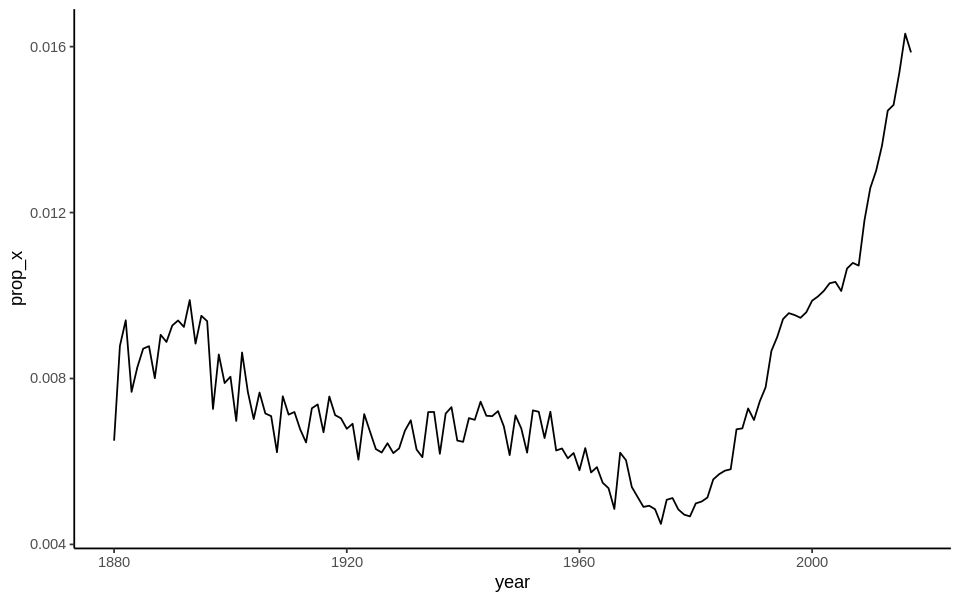

In [ ]:
# the proportion of baby names that contain "x" has been increasing in popularity lately!
babynames%>%
  group_by(year)%>%
  summarize(prop_x=mean(str_detect(name,"x")))%>%
  ggplot(aes(x=year,y=prop_x))+
  geom_line()

`str_count()`: rather than a true or false, it tells you how many matches there are in each string

In [ ]:
# counts the number of p's:
x<-c("apple","banana","pear")
str_count(x,"p")

[1] 2 0 1

Pairs well w/ `mutate()`

In [ ]:
# problem: doesn't count the upper cases
babynames%>%
  count(name)%>%
  mutate(
    vowels=str_count(name,"[aeiou]"),
    consonants=str_count(name,"[^aeiou]")
  )%>%
  head

# solution: makes all characters consistent
babynames%>%
  count(name)%>%
  mutate(
    name=str_to_lower(name),
    vowels=str_count(name,"[aeiou]"),
    consonants=str_count(name,"[^aeiou]")
  )%>%
  head

name,n,vowels,consonants
<chr>,<int>,<int>,<int>
Aaban,10,2,3
Aabha,5,2,3
Aabid,2,2,3
Aabir,1,2,3
Aabriella,5,4,5
Aada,1,2,2


name,n,vowels,consonants
<chr>,<int>,<int>,<int>
aaban,10,3,2
aabha,5,3,2
aabid,2,3,2
aabir,1,3,2
aabriella,5,5,4
aada,1,3,1


**Replace values**

`str_replace()`

`str_replace_all()`

In [ ]:
x<-c("apple","pear","banana")
str_replace_all(x,"[aeiou]","-")

[1] "-ppl-"  "p--r"   "b-n-n-"

**Extract variables**

`separate_wider_regex()`

`separate_wider_position()`

`separate_wider_delim()`

In [ ]:
df <- tribble(
  ~str,
  "<Sheryl>-F_34",
  "<Kisha>-F_45", 
  "<Brandon>-N_33",
  "<Sharon>-F_38", 
  "<Penny>-F_58",
  "<Justin>-M_41", 
  "<Patricia>-F_84", 
)

In [ ]:
df%>%
  separate_wider_regex(
    str,
    patterns=c(
      "<",
      name="[A-za-z]+",
      ">-",
      gender=".",
      "_",
      age="[0-9]+"
    )
  )

name,gender,age
<chr>,<chr>,<chr>
Sheryl,F,34
Kisha,F,45
Brandon,N,33
Sharon,F,38
Penny,F,58
Justin,M,41
Patricia,F,84


Character classes

\d matches any digit

\D matches anything that isn't a digit

\s matches any whitespace (space, tab, newline)

\S matches anything that isn't a whitespace

\w matches any "word" character (letters, numbers)

\W matches any "non-word" character

`regex()` and `ignore_case=TRUE`: allows characters to match either their upper or lower case terms

In [ ]:
bananas<-c("banana","Banana","BANANA")
str_view(bananas,regex("banana",ignore_case=TRUE))

HTML widgets cannot be represented in plain text (need html)

Find all sentences that start with "The"

* Need to anchor $

* Need to make sure the "e" is the last letter in the world by adding a boundary \b 

In [ ]:
# str_view(sentences,"^The\\b")

Find all sentences that begin with a pronoun

In [ ]:
# str_view(sentences,"^(She|He|It|They)\\b")